In [ ]:
import tensorflow as tf

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

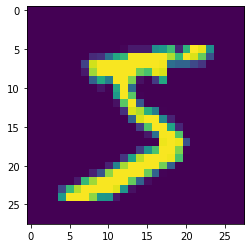

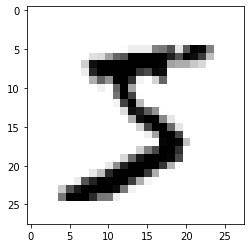

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
 
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

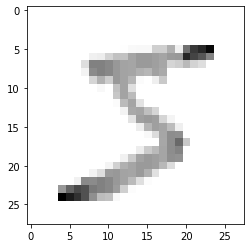

In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])

5


In [ ]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training samples dimension",x_trainr.shape)
print("Testing samples dimension",x_testr.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [ ]:
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))






In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [ ]:
print("Total training samples=",len(x_trainr))

Total training samples= 60000


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 40s 8ms/step - loss: 0.6757 - accuracy: 0.7852 - val_loss: 0.1261 - val_accuracy: 0.9619
Epoch 2/5
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0988 - accuracy: 0.9693 - val_loss: 0.0800 - val_accuracy: 0.9754
Epoch 3/5
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0644 - accuracy: 0.9809 - val_loss: 0.0799 - val_accuracy: 0.9758
Epoch 4/5
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.0571 - val_accuracy: 0.9826
Epoch 5/5
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0407 - accuracy: 0.9868 - val_loss: 0.0589 - val_accuracy: 0.9820


In [ ]:
test_loss,test_acc = model.evaluate(x_testr,y_test)
print("test loss on 10k samples",test_loss)
print("validation accuracy on 10k samples",test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0582 - accuracy: 0.9820
test loss on 10k samples 0.05819359049201012
validation accuracy on 10k samples 0.9819999933242798


In [ ]:
predictions=model.predict([x_testr])

In [ ]:
print(predictions)

[[3.5233762e-07 4.3169515e-05 1.5424063e-06 ... 9.9994564e-01
  2.3611497e-08 3.7674977e-06]
 [1.7572909e-04 3.3616924e-04 9.9939680e-01 ... 4.5531606e-06
  2.9036046e-05 4.7255002e-05]
 [6.1784175e-07 9.9998641e-01 3.5521882e-07 ... 3.2606149e-06
  2.9899718e-06 1.8322114e-06]
 ...
 [4.3212171e-06 3.2324169e-06 2.3118034e-06 ... 1.5670255e-05
  1.1052056e-05 9.6712389e-04]
 [3.0754487e-05 4.6344879e-11 8.4609275e-10 ... 1.0349653e-09
  1.7793083e-05 1.8287888e-06]
 [1.0577823e-05 1.4920989e-09 6.9151855e-07 ... 2.3459910e-09
  4.2986671e-06 1.2646835e-06]]


In [ ]:
print(np.argmax(predictions[0]))

7


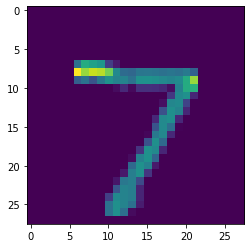

In [ ]:
plt.imshow(x_test[0])

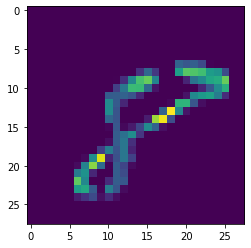

In [ ]:
plt.imshow(x_test[3567])

In [ ]:
print(np.argmax(predictions[3567]))

8
